In [12]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
songs_df = pd.read_csv("songs.csv")

In [8]:
songs_df.drop(songs_df.columns[[0]],axis=1,inplace=True)

In [10]:
songs_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,11874.000000,1.187400e+04,11874.000000
mean,0.565842,0.655355,5.260569,-7.649639,0.645360,0.070042,0.232754,0.097602,0.185806,0.472991,120.943590,2.770718e+05,3.936416
std,0.165373,0.223962,3.581208,4.287365,0.478424,0.073798,0.287455,0.241684,0.154963,0.245758,28.644228,3.402931e+05,0.340059
min,0.000000,0.000000,0.000000,-53.436000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.539000e+04,0.000000
25%,0.461000,0.513000,2.000000,-9.180750,0.000000,0.034000,0.013400,0.000000,0.093900,0.278000,99.950000,1.984492e+05,4.000000
50%,0.577000,0.698000,5.000000,-6.543000,1.000000,0.044400,0.091700,0.000052,0.122500,0.467000,119.964500,2.259400e+05,4.000000
75%,0.685000,0.833000,8.000000,-4.890000,1.000000,0.071000,0.372000,0.010600,0.228000,0.663000,139.248250,2.650625e+05,4.000000
max,0.980000,1.000000,11.000000,1.342000,1.000000,0.957000,0.995000,0.999000,0.988000,0.989000,240.052000,6.000661e+06,5.000000


In [14]:
X = songs_df.select_dtypes(include='number')
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.647,0.397,7,-13.234,1,0.0816,0.718,0.064800,0.0974,0.179,179.868,263689,4
1,0.500,0.523,5,-7.845,1,0.0574,0.272,0.000175,0.2480,0.413,190.958,226973,3
2,0.749,0.477,4,-6.060,0,0.1980,0.153,0.000011,0.8230,0.882,95.968,133893,4
3,0.739,0.283,9,-8.996,0,0.0597,0.307,0.000014,0.2500,0.431,127.970,265520,3
4,0.509,0.288,5,-11.317,0,0.0424,0.671,0.000607,0.1570,0.375,143.897,275827,3


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.490775,-1.153614,0.485731,-1.302571,0.741299,0.156618,1.688147,-0.135727,-0.570522,-1.196313,2.057200,-0.039329,0.186988
1,-0.398160,-0.590995,-0.072763,-0.045569,0.741299,-0.171318,0.136534,-0.403133,0.401367,-0.244116,2.444379,-0.147229,-2.753803
2,1.107587,-0.796396,-0.352010,0.370789,-1.348984,1.733965,-0.277461,-0.403813,4.112098,1.664350,-0.871961,-0.420769,0.186988
3,1.047116,-1.662650,1.044225,-0.314043,-1.348984,-0.140151,0.258298,-0.403801,0.414274,-0.170870,0.245310,-0.033948,-2.753803
4,-0.343735,-1.640324,-0.072763,-0.855424,-1.348984,-0.374584,1.524636,-0.401346,-0.185896,-0.398746,0.801361,-0.003658,-2.753803


In [15]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04,1.187400e+04
mean,-6.075185e-16,-3.584055e-16,-1.942937e-17,-1.223247e-16,2.077054e-15,-4.802645e-17,6.143907e-17,1.750289e-15,1.348555e-16,-5.164959e-17,-1.208772e-16,-1.352576e-16,-7.466745e-15
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-3.421748e+00,-2.926310e+00,-1.468999e+00,-1.067982e+01,-1.348984e+00,-9.491505e-01,-8.097405e-01,-4.038573e-01,-1.199087e+00,-1.924704e+00,-4.222445e+00,-6.514712e-01,-1.157618e+01
25%,-6.339994e-01,-6.356478e-01,-9.105048e-01,-3.571367e-01,-1.348984e+00,-4.884136e-01,-7.631225e-01,-4.038573e-01,-5.931087e-01,-7.934605e-01,-7.329391e-01,-2.310533e-01,1.869882e-01
50%,6.747308e-02,1.904195e-01,-7.276324e-02,2.581273e-01,7.412986e-01,-3.474823e-01,-4.907206e-01,-4.036429e-01,-4.085402e-01,-2.437754e-02,-3.418248e-02,-1.502644e-01,1.869882e-01
75%,7.205682e-01,7.932254e-01,7.649783e-01,6.436950e-01,7.412986e-01,1.297659e-02,4.844297e-01,-3.599965e-01,2.722982e-01,7.731900e-01,6.390618e-01,-3.529251e-02,1.869882e-01
max,2.504485e+00,1.538919e+00,1.602720e+00,2.097330e+00,7.412986e-01,1.201924e+01,2.651817e+00,3.729817e+00,5.176916e+00,2.099756e+00,4.158375e+00,1.682030e+01,3.127780e+00


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

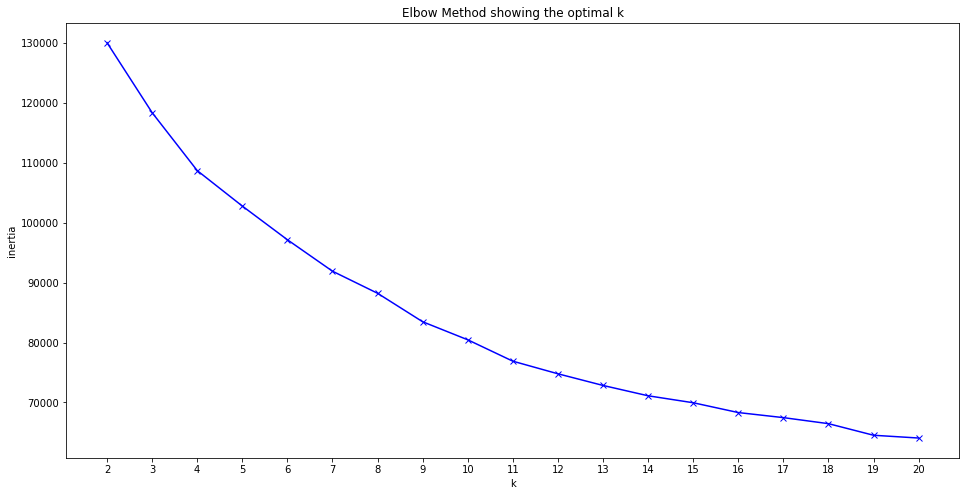

In [16]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [17]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=9, random_state=1234)

In [18]:
kmeans.labels_

array([6, 1, 4, ..., 6, 2, 0])

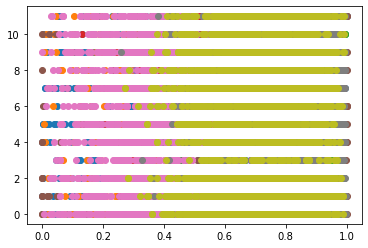

In [19]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 2])
    # show the plot
pyplot.show()

In [20]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     747
1     543
2    2491
3     557
4     624
5     103
6    1586
7    1944
8    3279
dtype: int64

In [21]:
X["cluster"] = clusters
X

C:\Users\floza\AppData\Local\Temp\ipykernel_14900\310910030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = clusters


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.647,0.397,7,-13.234,1,0.0816,0.71800,0.064800,0.0974,0.1790,179.868,263689,4,6
1,0.500,0.523,5,-7.845,1,0.0574,0.27200,0.000175,0.2480,0.4130,190.958,226973,3,1
2,0.749,0.477,4,-6.060,0,0.1980,0.15300,0.000011,0.8230,0.8820,95.968,133893,4,4
3,0.739,0.283,9,-8.996,0,0.0597,0.30700,0.000014,0.2500,0.4310,127.970,265520,3,1
4,0.509,0.288,5,-11.317,0,0.0424,0.67100,0.000607,0.1570,0.3750,143.897,275827,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11869,0.329,0.277,10,-13.111,0,0.0302,0.97100,0.024000,0.0971,0.1210,159.719,289560,3,1
11870,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4,7
11871,0.162,0.256,2,-11.296,1,0.0346,0.03320,0.092300,0.0621,0.0784,108.893,247027,4,6
11872,0.701,0.768,10,-7.754,0,0.0310,0.27000,0.000661,0.2860,0.4290,137.978,256000,4,2


In [22]:
songs_df["cluster"] = X["cluster"]

In [23]:
songs_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,title,cluster
0,0.647,0.397,7,-13.234,1,0.0816,0.71800,0.064800,0.0974,0.1790,...,audio_features,2RcrkBWCOWaX67jVDLgJr6,spotify:track:2RcrkBWCOWaX67jVDLgJr6,https://api.spotify.com/v1/tracks/2RcrkBWCOWaX...,https://api.spotify.com/v1/audio-analysis/2Rcr...,263689,4,Various Artists,Folha de Jurema,6
1,0.500,0.523,5,-7.845,1,0.0574,0.27200,0.000175,0.2480,0.4130,...,audio_features,3GmYxpXRc62mj4SuJ4WEsl,spotify:track:3GmYxpXRc62mj4SuJ4WEsl,https://api.spotify.com/v1/tracks/3GmYxpXRc62m...,https://api.spotify.com/v1/audio-analysis/3GmY...,226973,3,Kendra Morris,Banshee,1
2,0.749,0.477,4,-6.060,0,0.1980,0.15300,0.000011,0.8230,0.8820,...,audio_features,1pur8kv69XmZqA3uoMEYnH,spotify:track:1pur8kv69XmZqA3uoMEYnH,https://api.spotify.com/v1/tracks/1pur8kv69XmZ...,https://api.spotify.com/v1/audio-analysis/1pur...,133893,4,La Fine Equipe,Tourment d' amour,4
3,0.739,0.283,9,-8.996,0,0.0597,0.30700,0.000014,0.2500,0.4310,...,audio_features,6g6LjgaH5I23KOkLkJeGxE,spotify:track:6g6LjgaH5I23KOkLkJeGxE,https://api.spotify.com/v1/tracks/6g6LjgaH5I23...,https://api.spotify.com/v1/audio-analysis/6g6L...,265520,3,Allen Stone,Million,1
4,0.509,0.288,5,-11.317,0,0.0424,0.67100,0.000607,0.1570,0.3750,...,audio_features,3fVoaJNF8ALQlL0MG5XpWa,spotify:track:3fVoaJNF8ALQlL0MG5XpWa,https://api.spotify.com/v1/tracks/3fVoaJNF8ALQ...,https://api.spotify.com/v1/audio-analysis/3fVo...,275827,3,Jordan Rakei,Alright,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11869,0.329,0.277,10,-13.111,0,0.0302,0.97100,0.024000,0.0971,0.1210,...,audio_features,1vsFzbhQXTqKJ3YSWxWxmJ,spotify:track:1vsFzbhQXTqKJ3YSWxWxmJ,https://api.spotify.com/v1/tracks/1vsFzbhQXTqK...,https://api.spotify.com/v1/audio-analysis/1vsF...,289560,3,Various Artists,Rosyln,1
11870,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,...,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,The Weeknd,Blinding Lights,7
11871,0.162,0.256,2,-11.296,1,0.0346,0.03320,0.092300,0.0621,0.0784,...,audio_features,1s9i7W8zx7Nxx78MUIsvjV,spotify:track:1s9i7W8zx7Nxx78MUIsvjV,https://api.spotify.com/v1/tracks/1s9i7W8zx7Nx...,https://api.spotify.com/v1/audio-analysis/1s9i...,247027,4,M83,Outro,6
11872,0.701,0.768,10,-7.754,0,0.0310,0.27000,0.000661,0.2860,0.4290,...,audio_features,7mXQGiQEnojpKenNLyTVdY,spotify:track:7mXQGiQEnojpKenNLyTVdY,https://api.spotify.com/v1/tracks/7mXQGiQEnojp...,https://api.spotify.com/v1/audio-analysis/7mXQ...,256000,4,Udo Lindenberg,Ein Herz kann man nicht reparieren,2


In [24]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_9.pickle", "wb") as f:
    pickle.dump(kmeans,f)

FileNotFoundError: [Errno 2] No such file or directory: 'Model/scaler.pickle'

In [27]:
def save(model, filename = "filename.pickle"): 
    with open(filename, "wb") as f:
        pickle.dump(model, f)


In [28]:
save(scaler,"scaler.pickle")
save(kmeans,"kmeans9.pickle")

In [29]:
songs_df.to_csv("songs_clustered.csv")